In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\AI\\pythonProject\\venv\\python_basic\\project_data'

In [25]:
data1 = pd.read_csv('./블록별 성별연령대별 카드소비패턴.csv', encoding = 'cp949')
data2 = pd.read_csv('./카드소비 업종코드.csv', encoding = 'cp949')
data3 = pd.read_csv('./집계구별 일별소비지역별 카드소비패턴.csv', encoding = 'cp949')

In [26]:
df1 = pd.DataFrame(data=data1)
df2 = pd.DataFrame(data=data2)
df3 = pd.DataFrame(data=data3)

df1
df2
df3

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,서울,강남구,전자상거래,20201021,1123077020119,251500,25
1,서울,관악구,요식/유흥,20170312,1112052010107,158445,20
2,서울,마포구,주유,20161205,1113068050004,8048,15
3,서울,동작구,의료,20201210,1105066020601,22635,5
4,서울,NaN,가정생활/서비스,20210216,1117052020001,65390,10
...,...,...,...,...,...,...,...
495,서울,종로구,가전/가구,20201108,1120055030005,55330,10
496,부산,부평구,의료,20180901,1122058020102,853591,5
497,서울,강남구,유통,20160326,1123064020008,2052240,5
498,서울,서초구,스포츠/문화/레저,20160804,1124061010014,22635,5


In [27]:
data1.isna().sum()
data2.isna().sum()
data3.isna().sum()

가맹점주소광역시도(SIDO)          0
가맹점주소시군구(SGG)           58
업종대분류(UPJONG_CLASS1)     0
기준일자(YMD)                0
고객주소집계구별(TOT_REG_CD)     0
카드이용금액계(AMT_CORR)        0
카드이용건수계(USECT_CORR)      0
dtype: int64

In [28]:
data1 = data1.dropna()
data2 = data2.dropna()
data3 = data3.dropna()

data1.reset_index(drop=True, inplace=True)
data2.reset_index(drop=True, inplace=True)
data3.reset_index(drop=True, inplace=True)

data3['가맹점주소광역시도(SIDO)'].unique()

array(['서울', '경기', '인천', '제주', '경남', '대전', '광주', '부산', '경북', '충남', '충북',
       '대구', '강원', '전남', '전북'], dtype=object)

In [8]:
df_seoul = df3[(df3['가맹점주소광역시도(SIDO)'] == '서울')]
df_seoul['가맹점주소시군구(SGG)'].unique()  

array(['강남구', '관악구', '마포구', '동작구', nan, '중구', '송파구', '용산구', '성북구', '노원구',
       '서초구', '중랑구', '화성시', '용인시', '남양주시', '종로구', '가평군', '서대문구', '부천시',
       '양천구', '파주시', '영등포구', '수원시', '광주시', '은평구', '시흥시', '동대문구', '강동구',
       '안산시', '구로구', '고양시', '성남시', '김포시', '평택시', '성동구', '강북구', '이천시',
       '의정부시', '양주시', '강서구', '광진구', '금천구', '도봉구', '부평구', '안양시', '하남시',
       '양평군', '구리시'], dtype=object)

In [9]:
# 서울시에만 포함된 다른 지역의 시/군/구를 수정

df3.loc[df3['가맹점주소시군구(SGG)'] == '화성시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '용인시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '남양주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '부천시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '파주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '수원시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '광주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '시흥시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '안산시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '고양시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '성남시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '김포시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '평택시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '이천시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '의정부시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '양주시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '안양시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '하남시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '구리시', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '가평군', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '양평군', '가맹점주소광역시도(SIDO)'] = '경기'
df3.loc[df3['가맹점주소시군구(SGG)'] == '부평구', '가맹점주소광역시도(SIDO)'] = '인천'

df_seoul = df3[(df3['가맹점주소광역시도(SIDO)'] == '서울')]

In [10]:
# 매핑을 위해 지역코드를 삽입
df_sido = df3.groupby('가맹점주소광역시도(SIDO)').sum().reset_index() # 가맹점주소광역시도로 group
def code(row):
    if row['가맹점주소광역시도(SIDO)'] == '강원':
        val = '32'
    if row['가맹점주소광역시도(SIDO)'] == '경기':
        val = '31'
    if row['가맹점주소광역시도(SIDO)'] == '경남':
        val = '38'
    if row['가맹점주소광역시도(SIDO)'] == '경북':
        val = '37'
    if row['가맹점주소광역시도(SIDO)'] == '광주':
        val = '24'
    if row['가맹점주소광역시도(SIDO)'] == '대구':
        val = '22'
    if row['가맹점주소광역시도(SIDO)'] == '대전':
        val = '25'
    if row['가맹점주소광역시도(SIDO)'] == '부산':
        val = '21'
    if row['가맹점주소광역시도(SIDO)'] == '서울':
        val = '11'
    if row['가맹점주소광역시도(SIDO)'] == '세종':
        val = '29'
    if row['가맹점주소광역시도(SIDO)'] == '인천':
        val = '23'
    if row['가맹점주소광역시도(SIDO)'] == '전남':
        val = '36'
    if row['가맹점주소광역시도(SIDO)'] == '전북':
        val = '35'
    if row['가맹점주소광역시도(SIDO)'] == '전남':
        val = '36'
    if row['가맹점주소광역시도(SIDO)'] == '제주':
        val = '39'
    if row['가맹점주소광역시도(SIDO)'] == '충남':
        val = '34'
    if row['가맹점주소광역시도(SIDO)'] == '충북':
        val = '33'
    return val

df_sido['시/도 코드'] = df_sido.apply(code, axis=1)

In [29]:
# ! pip install folium

import urllib.request 
import requests
import json 
import folium
import seaborn as sns
from pandas.io.json import json_normalize

url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json"
response = urllib.request.urlopen(url) 
geo_str = response.read().decode("utf-8")
geo_object = json.loads(geo_str)

In [30]:
# 매핑을 위해 지역코드를 삽입
# 지역 이름도 가능하지만, 다른 지역과 이름이 겹치는 구가 존재함 (서울 중구/대구 중구)
df_seoul = df_seoul.groupby('가맹점주소시군구(SGG)').sum().reset_index()

def gucode(row):
    if row['가맹점주소시군구(SGG)'] == '강동구':
        val = '11250'
    if row['가맹점주소시군구(SGG)'] == '강북구':
        val = '11090'
    if row['가맹점주소시군구(SGG)'] == '종로구':
        val = '11010'
    if row['가맹점주소시군구(SGG)'] == '중구':
        val = '11020'
    if row['가맹점주소시군구(SGG)'] == '용산구':
        val = '11030'
    if row['가맹점주소시군구(SGG)'] == '성동구':
        val = '11040'
    if row['가맹점주소시군구(SGG)'] == '광진구':
        val = '11050'
    if row['가맹점주소시군구(SGG)'] == '동대문구':
        val = '11060'
    if row['가맹점주소시군구(SGG)'] == '중랑구':
        val = '11070'
    if row['가맹점주소시군구(SGG)'] == '성북구':
        val = '11080'
    if row['가맹점주소시군구(SGG)'] == '도봉구':
        val = '11100'
    if row['가맹점주소시군구(SGG)'] == '노원구':
        val = '11110'
    if row['가맹점주소시군구(SGG)'] == '은평구':
        val = '11120'
    if row['가맹점주소시군구(SGG)'] == '서대문구':
        val = '11130'
    if row['가맹점주소시군구(SGG)'] == '마포구':
        val = '11140'
    if row['가맹점주소시군구(SGG)'] == '양천구':
        val = '11150'
    if row['가맹점주소시군구(SGG)'] == '강서구':
        val = '11160'
    if row['가맹점주소시군구(SGG)'] == '구로구':
        val = '11170'
    if row['가맹점주소시군구(SGG)'] == '금천구':
        val = '11180'
    if row['가맹점주소시군구(SGG)'] == '영등포구':
        val = '11190'
    if row['가맹점주소시군구(SGG)'] == '동작구':
        val = '11200'
    if row['가맹점주소시군구(SGG)'] == '관악구':
        val = '11210'
    if row['가맹점주소시군구(SGG)'] == '서초구':
        val = '11220'
    if row['가맹점주소시군구(SGG)'] == '강남구':
        val = '11230'
    if row['가맹점주소시군구(SGG)'] == '송파구':
        val = '11240'
    return val

df_seoul['구 코드'] = df_seoul.apply(gucode, axis=1)

In [32]:
seoul_map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='cartodbpositron')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
folium.Choropleth(
    geo_data=geo_object,
    data=df_seoul,
    columns=['구 코드','카드이용금액계(AMT_CORR)'],
    key_on='properties.code',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    highlight = True,
    legend_name='누적 카드이용금액'
).add_to(seoul_map)

# display map
seoul_map

In [33]:
data3['가맹점주소광역시도(SIDO)'] == '서울'
temp = data3.groupby('가맹점주소시군구(SGG)')['UPJONG_CLASS1'].value_counts().to_frame()
temp.columns = ['amount']
temp = temp.reset_index(drop = False)
temp = temp.pivot(index = 'country', columns='UPJONG_CLASS1')['amount']
temp['all'] = temp.sum(axis = 1)

for c in temp.columns:
    temp[c] = temp[c] / temp['all']*100
temp = temp.drop(['all'], axis = 1)
temp = temp.T
temp.columns = ['서울 외', '서울']
labels = temp.index.values
y1 = temp['서울 외'].values
y2 = temp['서울'].values
explode = [0.02 for i in range(14)]


# print(len(labels))
plt.figure(figsize = (20, 10))
plt.subplot(1, 2, 1)
color = sns.color_palette('pastel')[:18]
plt.pie(y1, labels = labels, colors=color, explode = explode, autopct='%1.1f%%', textprops= {'fontsize' : 10})
plt.title('서울 외 업종별 카드 이용 현황')
plt.subplot(1, 2, 2)
plt.pie(y2, labels = labels, colors=color, explode = explode, autopct='%1.1f%%',  textprops= {'fontsize' : 10})
plt.title('서울 업종별 카드 이용 현황')
plt.suptitle('지역에 따른 업종별 카드 이용 현황', fontsize = 25)
plt.show()

KeyError: 'Column not found: UPJONG_CLASS1'

In [34]:
seoul = ['강남구', '관악구', '마포구', '동작구', '중구', '송파구', '용산구', '성북구', '노원구', '서초구', '중랑구', '종로구', '서대문구', '영등포구', '은평구', '동대문구', '강동구', '구로구', '성동구', '강북구', '강서구', '광진구', '금천구', '도봉구', '양천구']
gyeonggi = ['수원시', '용인시', '성남시', '부천시', '화성시', '안산시', '안양시', '평택시', '시흥시', '김포시', '광주시', '광명시', '군포시', '하남시', '오산시', '이천시', '안성시', '의왕시', '양평군', '여주시', '과천시', '고양시', '남양주시', '파주시', '의정부시', '양주시', '구리시', '포천시', '동두천시', '가평군', '연천군']

In [36]:
for i in range(len(data3)):
    if data3['가맹점주소시군구(SGG)'][i] in seoul:
        if data3['가맹점주소시군구(SGG)'][i] == '중구' and data3['가맹점주소광역시도(SIDO)'][i] == '대전':
            continue
        if data3['가맹점주소시군구(SGG)'][i] in ['중구', '강서구'] and data3['가맹점주소광역시도(SIDO)'][i] == '부산':
            continue
        if data3['가맹점주소시군구(SGG)'][i] == '중구' and data3['가맹점주소광역시도(SIDO)'][i] == '대구':
            continue
        if data3['가맹점주소시군구(SGG)'][i] == '중구' and data3['가맹점주소광역시도(SIDO)'][i] == '울산':
            continue    
        if data3['가맹점주소시군구(SGG)'][i] == '중구' and data3['가맹점주소광역시도(SIDO)'][i] == '인천':
            continue    
        data3['가맹점주소광역시도(SIDO)'][i] = '서울'
    elif data3['가맹점주소시군구(SGG)'][i] in gyeonggi:
        data3['가맹점주소광역시도(SIDO)'][i] = '경기'
    else:
        continue

In [37]:
data3['가맹점주소광역시도(SIDO)'].value_counts()

서울    338
경기     99
대구      2
부산      2
강원      1
Name: 가맹점주소광역시도(SIDO), dtype: int64

In [38]:
data3_seoul = data3[data3['가맹점주소광역시도(SIDO)'] == '서울']

data3_seoul.reset_index(drop=True, inplace=True)

data3_seoul['기준일자(YMD)'] = data3_seoul['기준일자(YMD)'].astype('str')
data3_seoul['기준일자(YMD)'] = pd.to_datetime(data3_seoul['기준일자(YMD)'])

data3_seoul['기준요일'] = data3_seoul['기준일자(YMD)'].dt.dayofweek

day = {
    0 : '월',
    1 : '화',
    2 : '수',
    3 : '목',
    4 : '금',
    5 : '토',
    6 : '일',
}
 
data3_seoul['기준요일'] = [day[k] for k in data3_seoul['기준일자(YMD)'].dt.dayofweek]

data3_seoul.head()

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준요일
0,서울,강남구,전자상거래,2020-10-21,1123077020119,251500,25,수
1,서울,관악구,요식/유흥,2017-03-12,1112052010107,158445,20,일
2,서울,마포구,주유,2016-12-05,1113068050004,8048,15,월
3,서울,동작구,의료,2020-12-10,1105066020601,22635,5,목
4,서울,마포구,유통,2020-03-19,1108060020010,20120,25,목


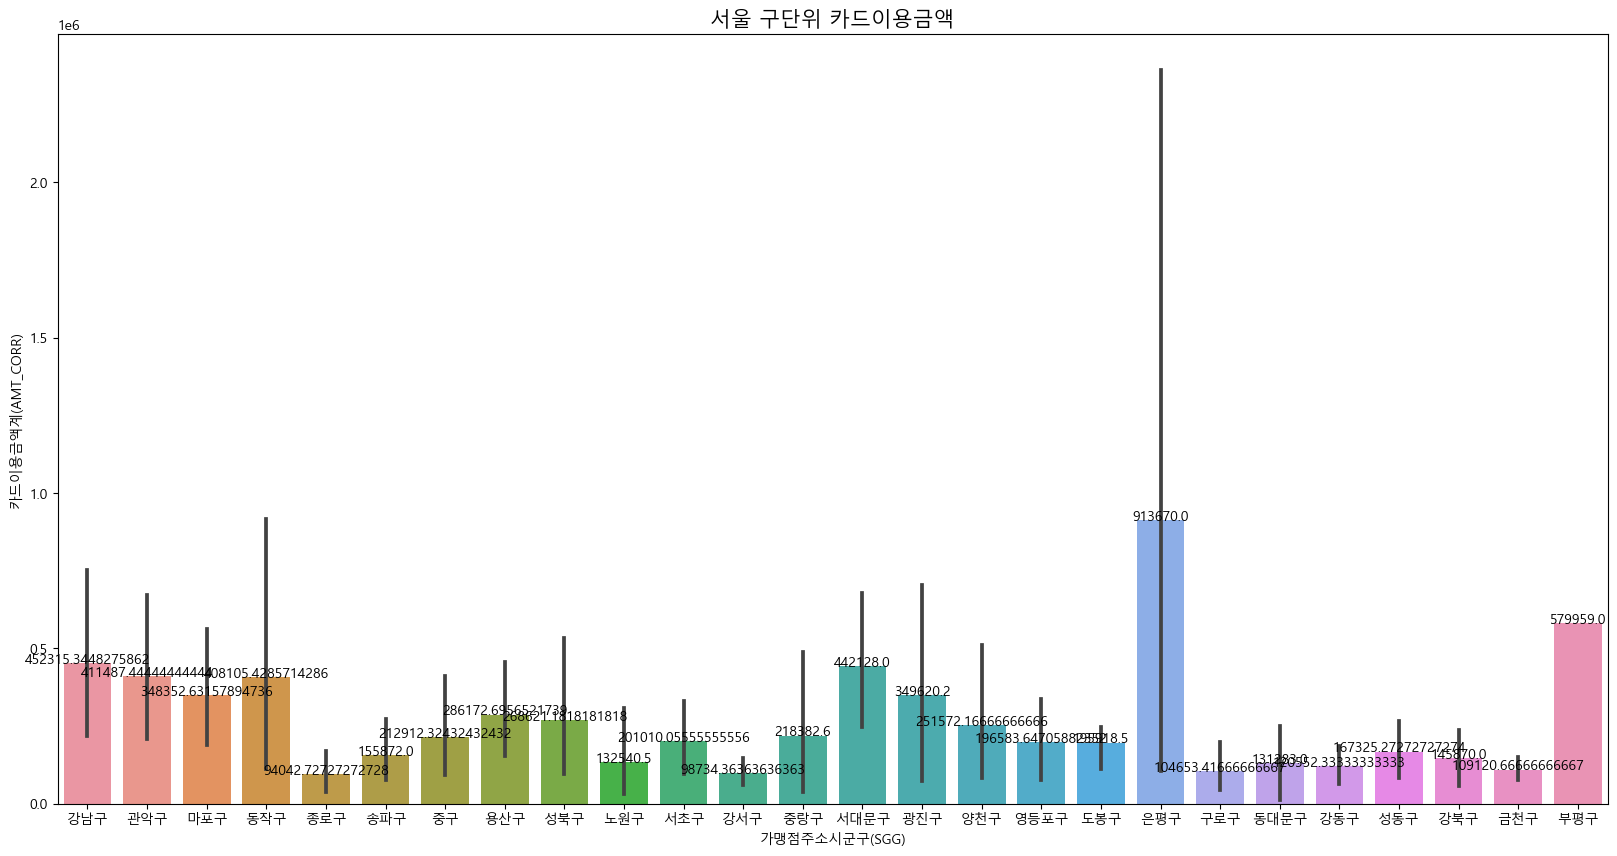

In [39]:
plt.rcParams['font.family']= 'Malgun Gothic'  # 한글 처리
plt.rcParams['axes.unicode_minus'] = False  # -, $ 등등에 표현 특수기호로 버리지 말고 다 써줘라.

plt.figure(figsize=(20,10))
ax=sns.barplot(data=data3_seoul,x='가맹점주소시군구(SGG)', y='카드이용금액계(AMT_CORR)')
plt.title('서울 구단위 카드이용금액',fontsize=15)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height, height, ha = 'center', size = 10)

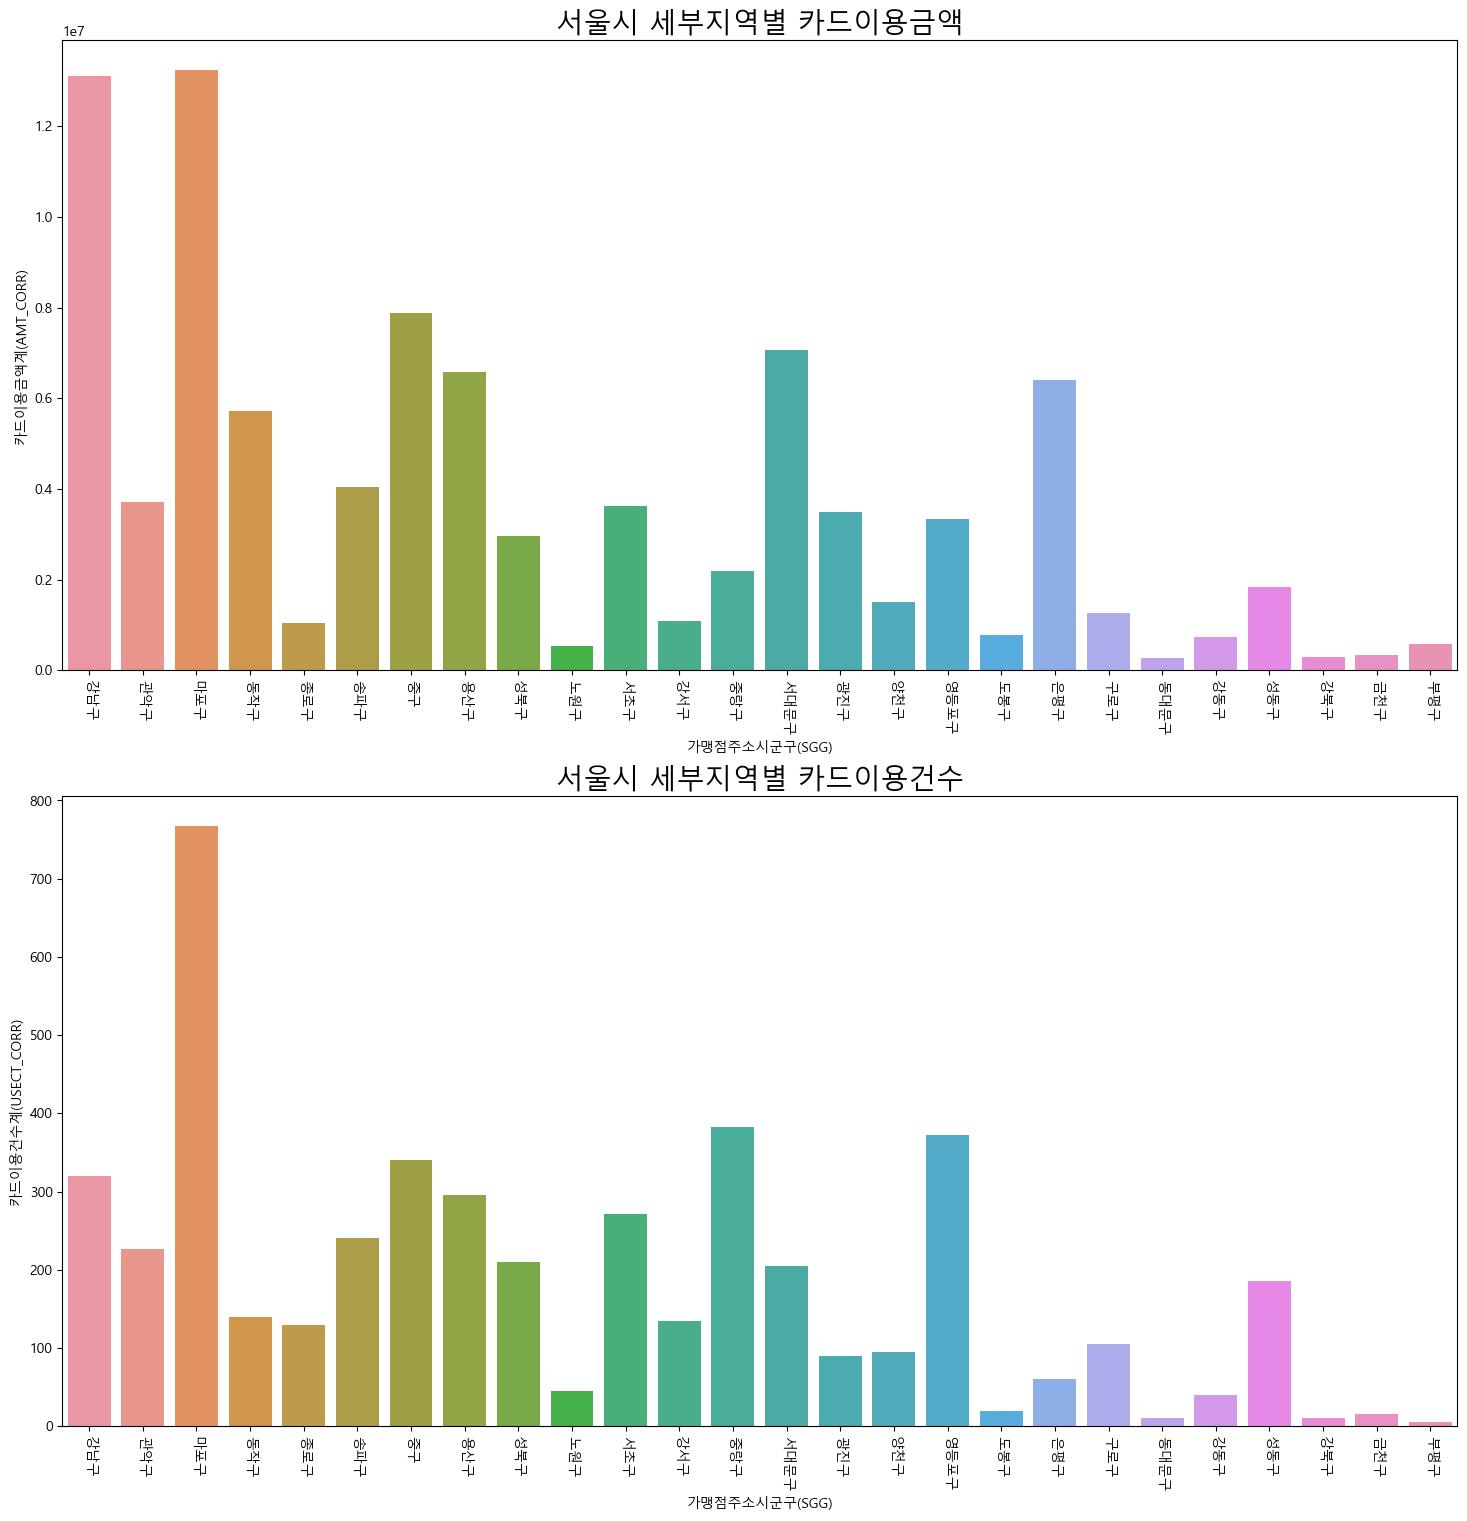

In [40]:
f,ax=plt.subplots(2,1,figsize=(18,18))
sns.barplot(data=data3_seoul,x='가맹점주소시군구(SGG)',y='카드이용금액계(AMT_CORR)',estimator=sum, ci=None,ax=ax[0,])
ax[0,].set_title('서울시 세부지역별 카드이용금액',fontsize=20)
ax[0,].set_xticklabels(data3_seoul['가맹점주소시군구(SGG)'].dropna().unique(),rotation=-90)
x=data3_seoul.groupby(by='업종대분류(UPJONG_CLASS1)')['카드이용금액계(AMT_CORR)'].sum().sort_values(ascending=False).index
y=data3_seoul.groupby(by='업종대분류(UPJONG_CLASS1)')['카드이용금액계(AMT_CORR)'].sum().sort_values(ascending=False)
colors=sns.color_palette('hls',len(x))
sns.barplot(data=data3_seoul,x='가맹점주소시군구(SGG)',y='카드이용건수계(USECT_CORR)',estimator=sum, ci=None,ax=ax[1,])
ax[1,].set_title('서울시 세부지역별 카드이용건수',fontsize=20)
ax[1,].set_xticklabels(data3_seoul['가맹점주소시군구(SGG)'].dropna().unique(),rotation=-90)
x=data3_seoul.groupby(by='업종대분류(UPJONG_CLASS1)')['카드이용건수계(USECT_CORR)'].sum().sort_values(ascending=False).index
y=data3_seoul.groupby(by='업종대분류(UPJONG_CLASS1)')['카드이용건수계(USECT_CORR)'].sum().sort_values(ascending=False)
plt.show()

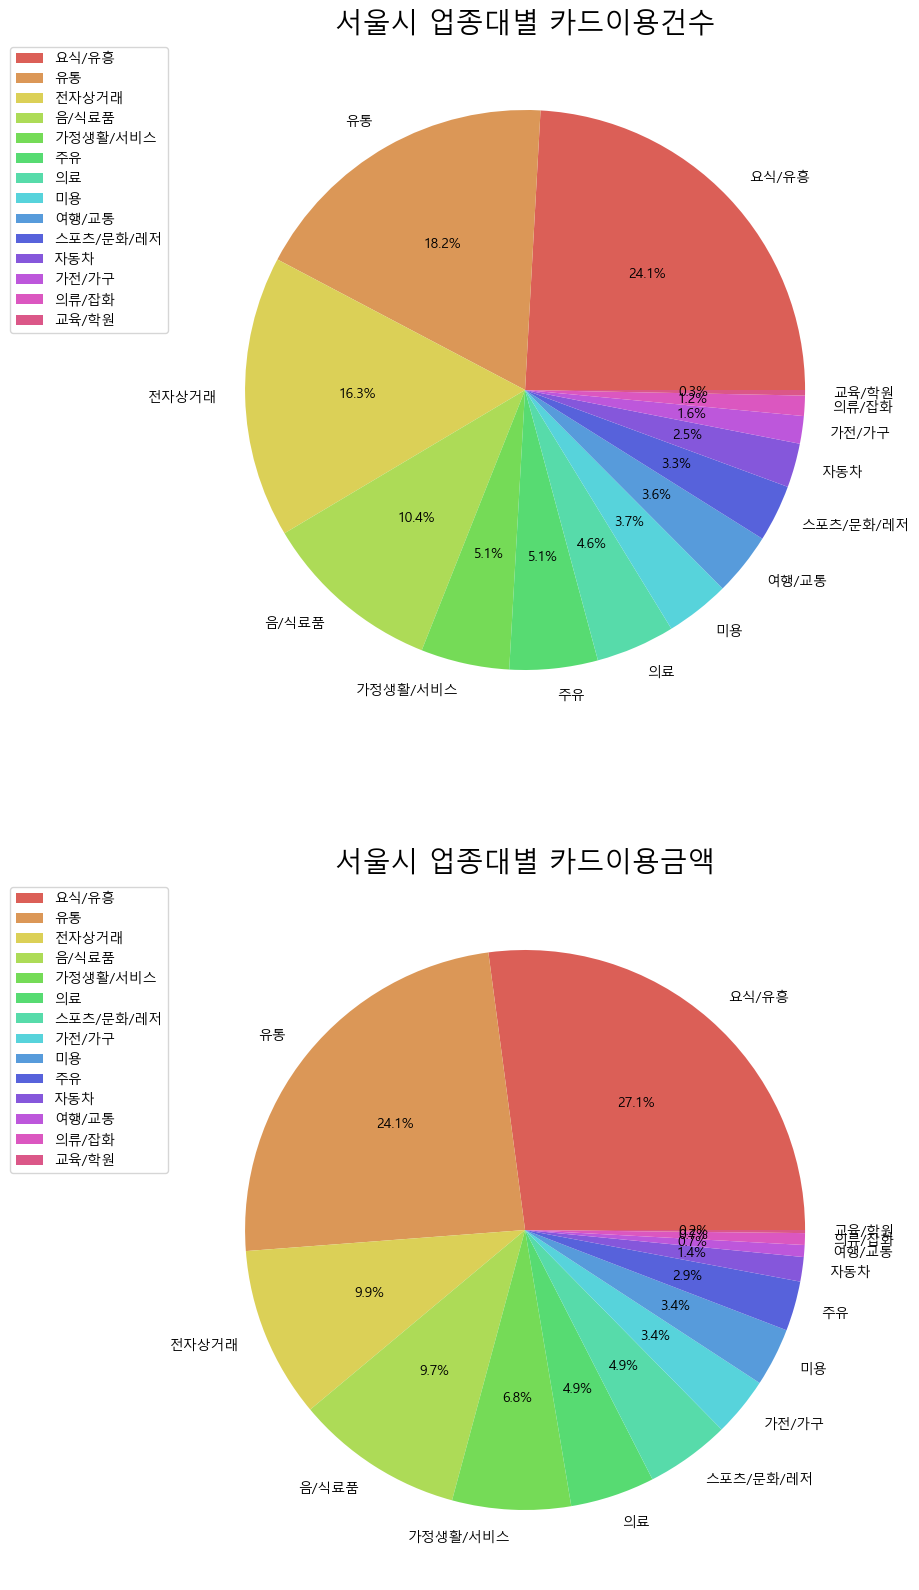

In [41]:
f,ax=plt.subplots(2,1,figsize=(20,20))
x1=data3_seoul.groupby(by='업종대분류(UPJONG_CLASS1)')['카드이용건수계(USECT_CORR)'].sum().sort_values(ascending=False).index
x2=data3_seoul.groupby(by='업종대분류(UPJONG_CLASS1)')['카드이용금액계(AMT_CORR)'].sum().sort_values(ascending=False).index
y1=data3_seoul.groupby(by='업종대분류(UPJONG_CLASS1)')['카드이용건수계(USECT_CORR)'].sum().sort_values(ascending=False)
y2=data3_seoul.groupby(by='업종대분류(UPJONG_CLASS1)')['카드이용금액계(AMT_CORR)'].sum().sort_values(ascending=False)
colors=sns.color_palette('hls',len(x))
ax[0,].pie(y1,labels=x1,autopct='%.1f%%',colors=colors)
ax[0,].set_title('서울시 업종대별 카드이용건수',fontsize=20)
ax[0,].legend(bbox_to_anchor=(0,1))
ax[1,].pie(y2,labels=x2,autopct='%.1f%%',colors=colors)
ax[1,].set_title('서울시 업종대별 카드이용금액',fontsize=20)
ax[1,].legend(bbox_to_anchor=(0,1))
plt.show()

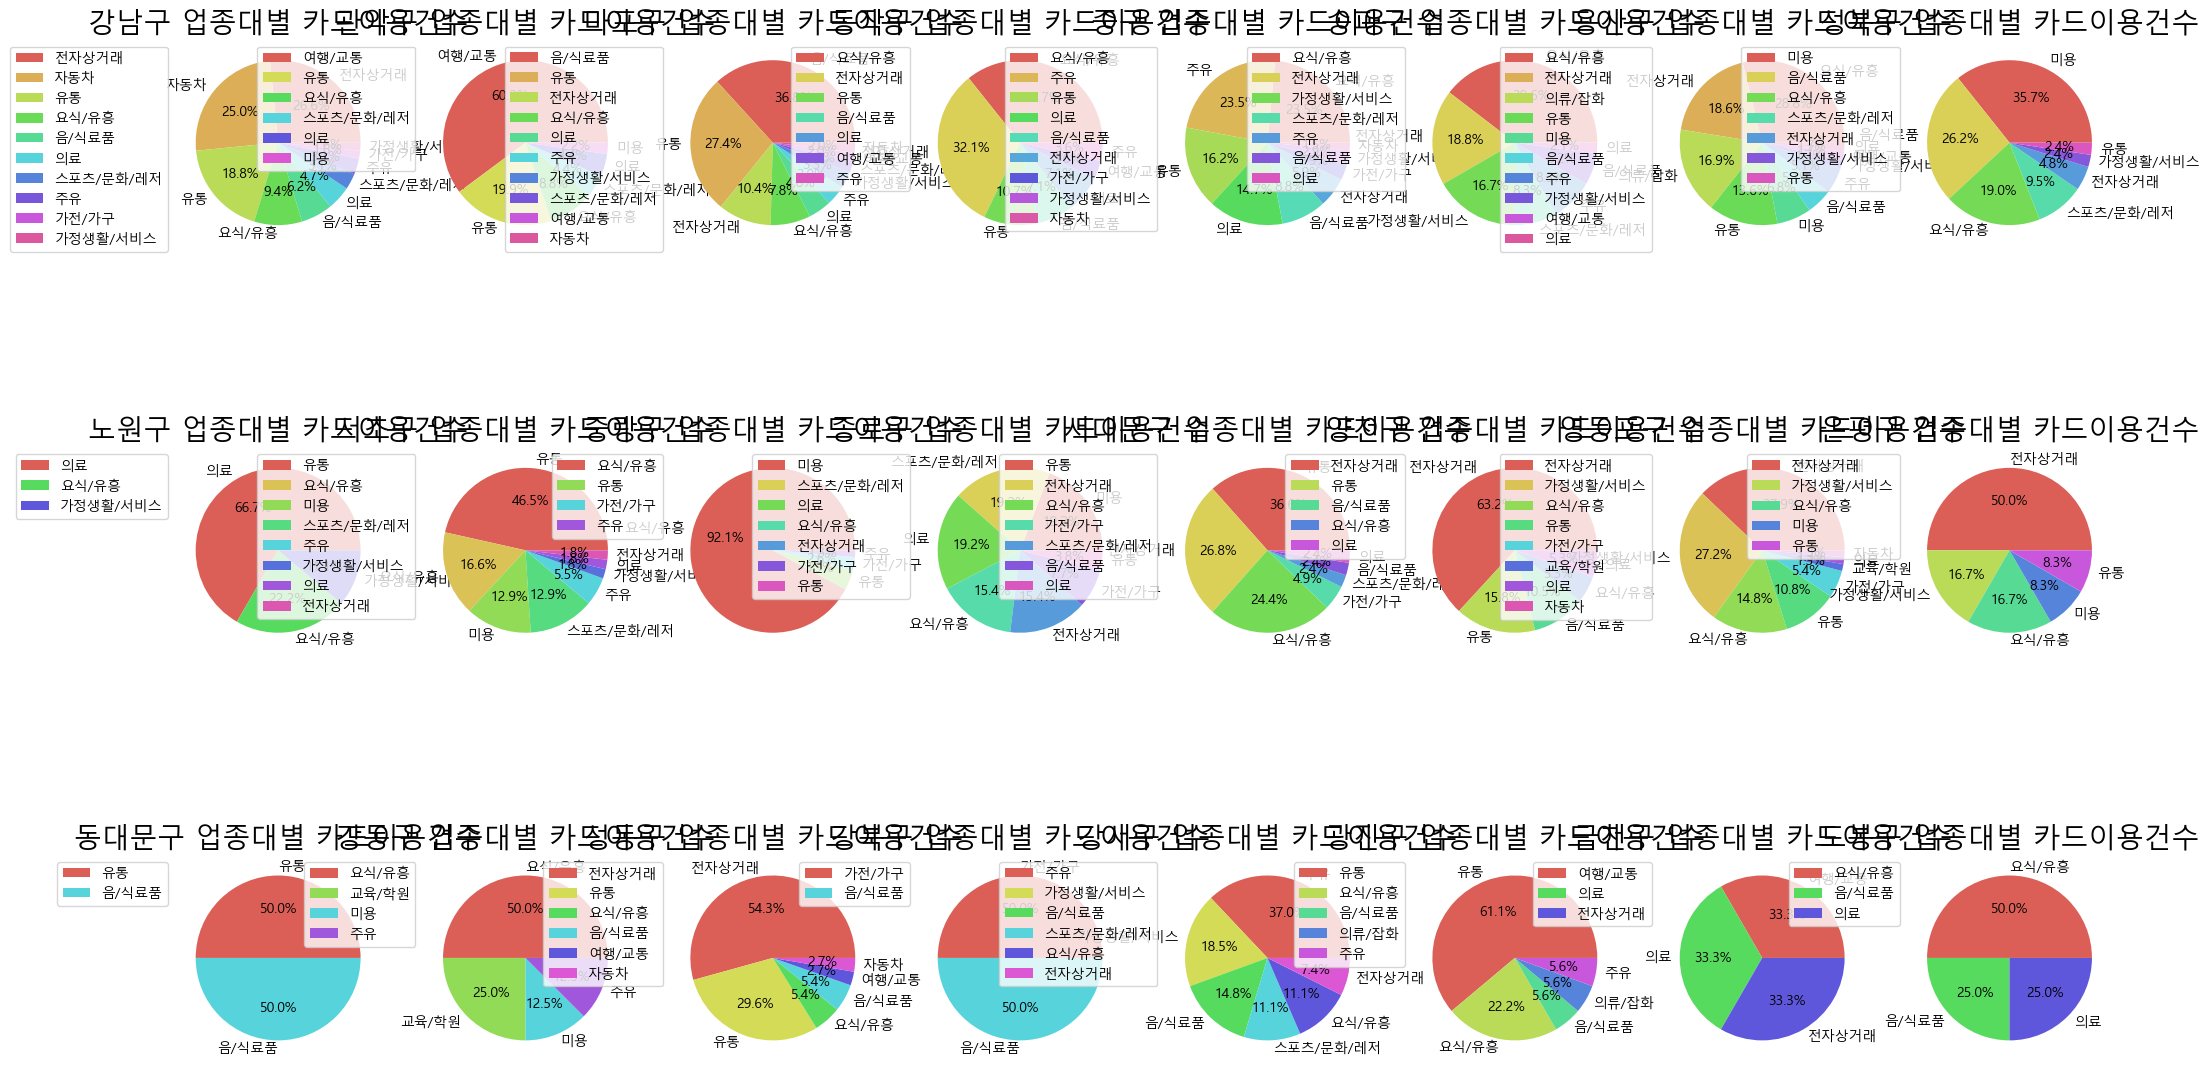

In [42]:
districts = ['강남구', '관악구', '마포구', '동작구', '중구', '송파구', '용산구', '성북구', '노원구','서초구', '중랑구', '종로구', '서대문구', '양천구', '영등포구', '은평구', '동대문구', '강동구', 
             '성동구', '강북구', '강서구', '광진구', '금천구', '도봉구']

f,ax=plt.subplots(3,8,figsize=(25,15))

for i,v in enumerate(districts) : 
    row = i//8
    columns = i%8
    ax[row][columns]
    data3_mapo=data3_seoul[data3_seoul['가맹점주소시군구(SGG)']==v]
    x=data3_mapo.groupby('업종대분류(UPJONG_CLASS1)')['카드이용건수계(USECT_CORR)'].sum().sort_values(ascending=False).index
    y=data3_mapo.groupby('업종대분류(UPJONG_CLASS1)')['카드이용건수계(USECT_CORR)'].sum().sort_values(ascending=False)
    colors=sns.color_palette('hls',len(x))
    ax[row][columns].pie(y,labels=x,autopct='%.1f%%',colors=colors)
    ax[row][columns].set_title(v + ' 업종대별 카드이용건수',fontsize=20)
    ax[row][columns].legend(bbox_to_anchor=(0,1))
    
plt.show()

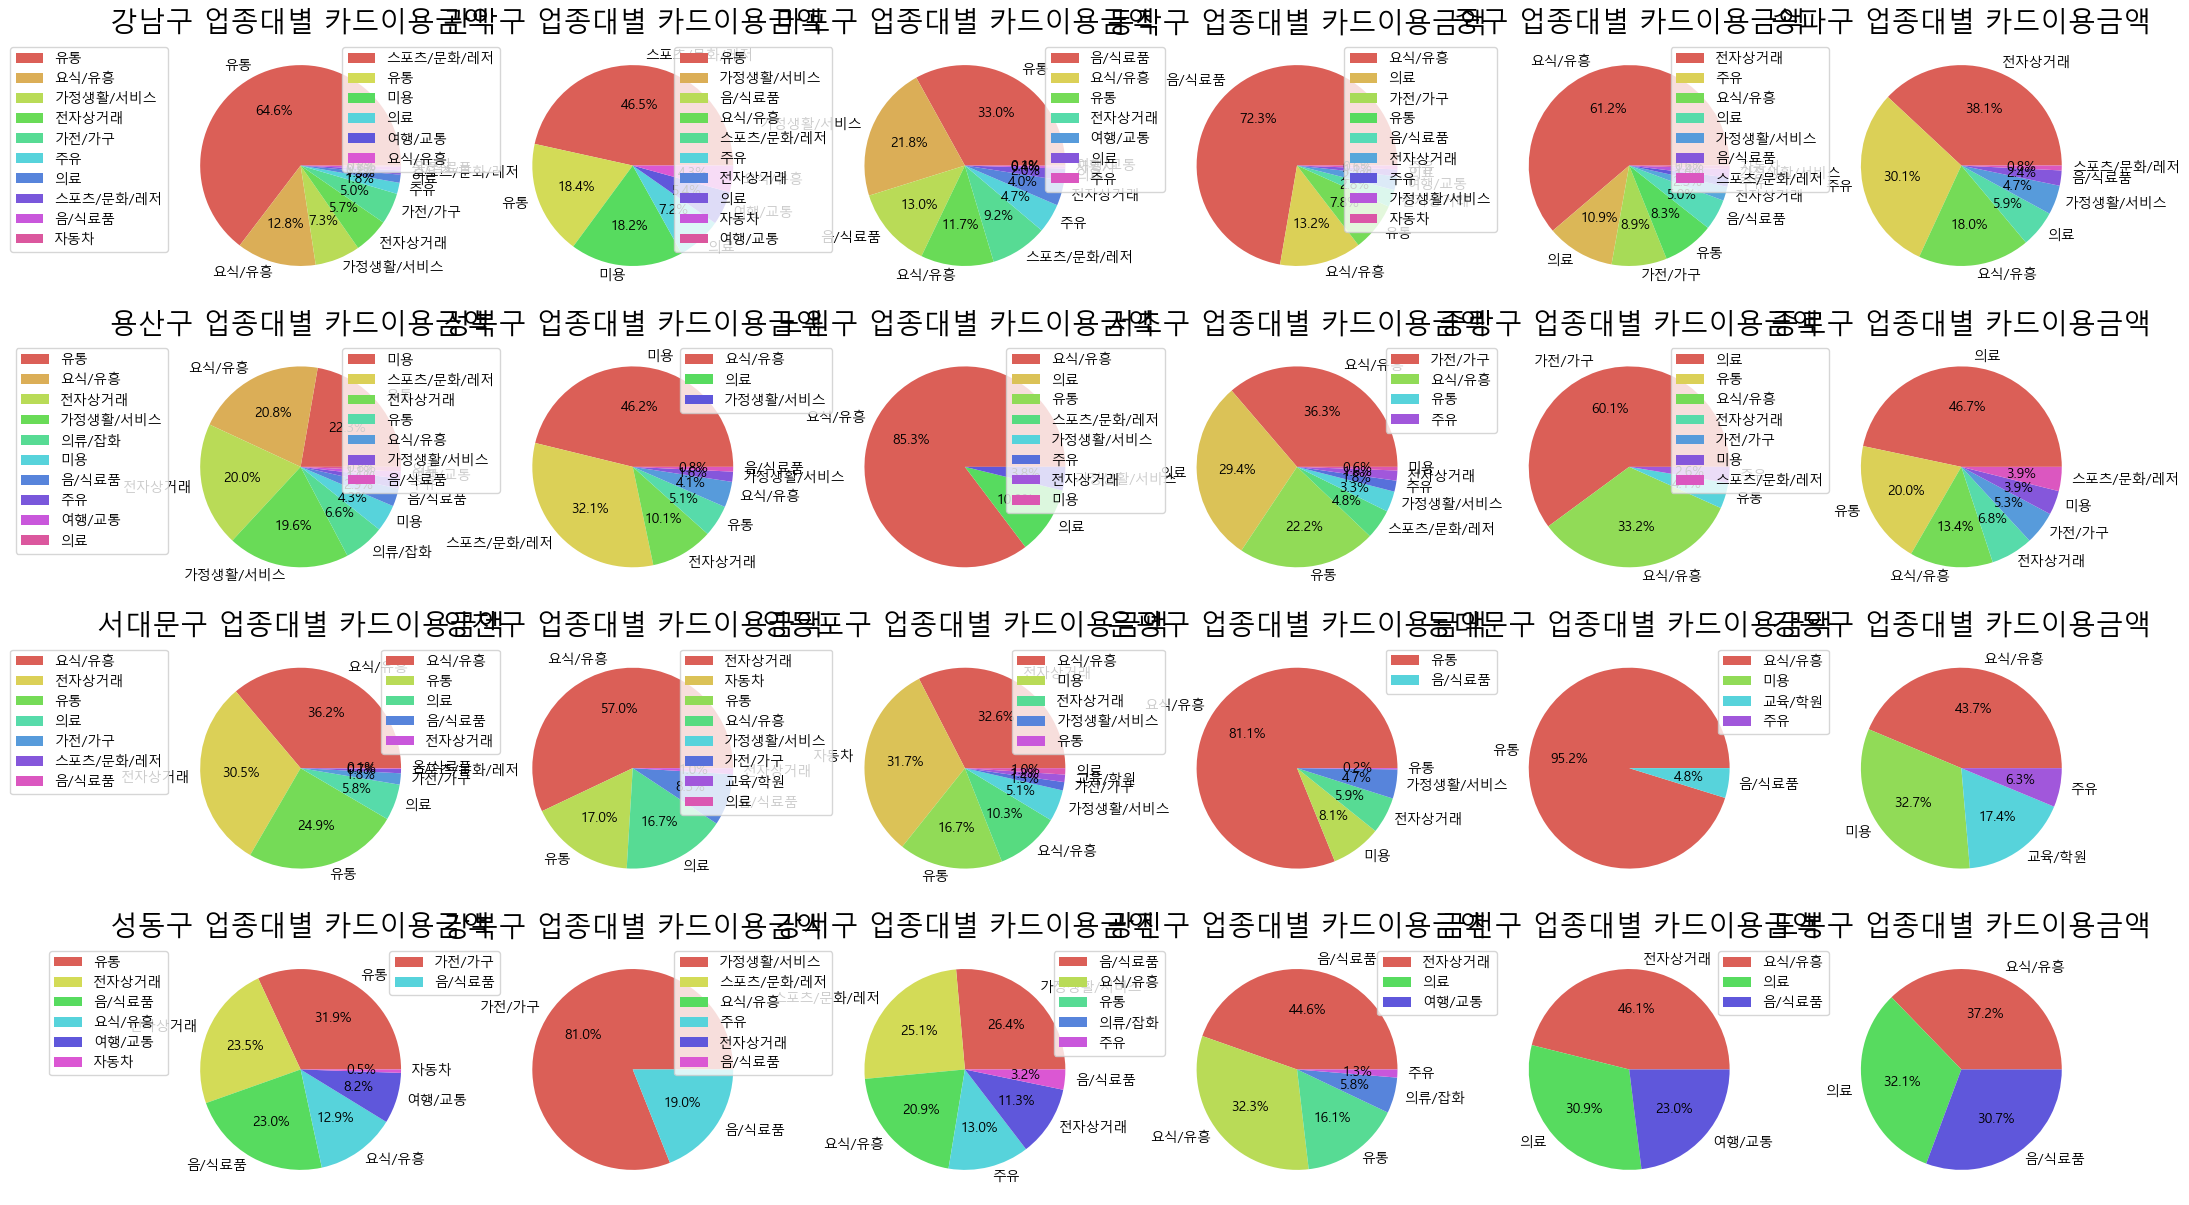

In [43]:
districts = ['강남구', '관악구', '마포구', '동작구', '중구', '송파구', '용산구', '성북구', '노원구','서초구', '중랑구', '종로구', '서대문구', '양천구', '영등포구', '은평구', '동대문구', '강동구', 
             '성동구', '강북구', '강서구', '광진구', '금천구', '도봉구']

f,ax=plt.subplots(4,6,figsize=(25,15))

for i,v in enumerate(districts) : 
    row = i//6
    columns = i%6
    ax[row][columns]
    data3_mapo=data3_seoul[data3_seoul['가맹점주소시군구(SGG)']==v]
    x=data3_mapo.groupby('업종대분류(UPJONG_CLASS1)')['카드이용금액계(AMT_CORR)'].sum().sort_values(ascending=False).index
    y=data3_mapo.groupby('업종대분류(UPJONG_CLASS1)')['카드이용금액계(AMT_CORR)'].sum().sort_values(ascending=False)
    colors=sns.color_palette('hls',len(x))
    ax[row][columns].pie(y,labels=x,autopct='%.1f%%',colors=colors)
    ax[row][columns].set_title(v + ' 업종대별 카드이용금액',fontsize=20)
    ax[row][columns].legend(bbox_to_anchor=(0,1))
    
plt.show()